# Plots
## Accuracy für KNN 

In [1]:
import numpy as np
import pandas as pnd

     number of k  accuracy explained variance
0              2    0.4600               0.25
1              3    0.4874               0.25
2              4    0.4964               0.25
3              5    0.5150               0.25
4              6    0.5181               0.25
..           ...       ...                ...
107           11    0.8575               1.00
108           12    0.8572               1.00
109           13    0.8552               1.00
110           14    0.8557               1.00
111           15    0.8537               1.00

[112 rows x 3 columns]


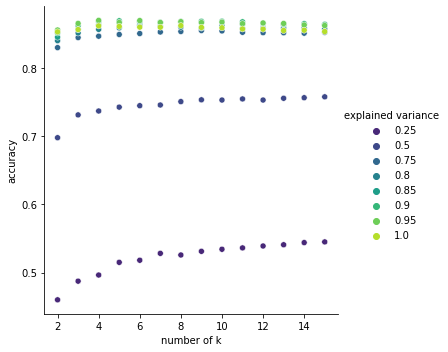

In [20]:
import csv
import seaborn as sns
from scipy import spatial
from collections import Counter
from scipy.stats import mode
from functions.PCA import pca
from pathlib import Path
import matplotlib.pyplot as plt
import os
import glob
from functions.KNN import *
from sklearn.metrics import precision_recall_fscore_support


dataset = 1
match dataset:
    case 1:
        test = 'fashion-mnist_test.csv'
        train = 'fashion-mnist_train.csv'
    case 2: 
        test = "mnist_test.csv"
        train = "mnist_train.csv"
testdata = pnd.read_csv(test)
traindata = pnd.read_csv(train)

testdata_pixel = testdata.drop(testdata.columns[0], axis=1).to_numpy()
traindata_pixel = traindata.drop(traindata.columns[0], axis=1).to_numpy()
label_train = traindata[traindata.columns[0]].to_numpy()
label_test = testdata[testdata.columns[0]].to_numpy()

class_names = np.array(["T-shirt / Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"])

folder_path = 'C:/Users/awark/Bioinfo Projekt/Results/'  # Path to the "results" folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]


csv_filess = glob.glob(folder_path + '/*.csv')



#knnallk = pnd.read_csv('C:/Users/awark/Bioinfo Projekt/Results/out.csv')
totallist = []
for csvdata in csv_filess:
    df = pnd.read_csv(csvdata)
    for i in range(14):
        accuracy = np.sum(df.iloc[:,i] == label_test)/ len(label_test)
        totallist.append(accuracy)
varvec = [0.25,0.5,0.75,0.8,0.85,0.9,0.95,1]
pclist = [i for i in varvec for _ in range(14)]
klist = [i for _ in range(8) for i in range(2,16)]
totallist = pnd.DataFrame({"number of k":klist,"accuracy":totallist,"explained variance":pnd.Categorical(pclist, ordered=True)})

print(totallist)
palette = sns.color_palette('viridis', len(totallist['explained variance'].unique()))
variancepcsks = sns.relplot(
data=totallist,
x = 'number of k',
y= 'accuracy',
hue = 'explained variance',
palette = palette
)
plt.savefig('variancepcsks.png', dpi=600)

## Specificity and sensitivity


In [ ]:
totallist_sensitivity = []
for csvdata in csv_filess:
    df = pnd.read_csv(csvdata)
    for i in range(14):
        accuracy = np.sum(df.iloc[:,i] == label_test)/ len(label_test)
        totallist.append(accuracy)

               T-shirt / Top  Trouser  Pullover  ...  Sneaker    Bag  Ankle Boot
T-shirt / Top          75.51     0.82      1.63  ...     0.00   0.31        0.00
Trouser                 0.09    98.87      0.00  ...     0.00   0.10        0.00
Pullover                1.41     0.21     78.76  ...     0.00   1.67        0.00
Dress                   1.50     1.75      1.12  ...     0.00   0.31        0.00
Coat                    0.35     0.10     11.18  ...     0.00   0.73        0.00
Sandal                  0.00     0.00      0.00  ...     0.37   0.00        0.27
Shirt                   8.28     0.92      8.84  ...     0.00   2.19        0.00
Sneaker                 0.09     0.00      0.00  ...    85.54   1.25        2.92
Bag                     0.79     0.00      0.10  ...     0.00  97.49        0.00
Ankle Boot              0.09     0.00      0.00  ...     5.58   0.42       87.97

[10 rows x 10 columns]
[array([0.8028103 , 0.97568389, 0.78125   , ..., 0.95350026, 0.95350026,
       0.975

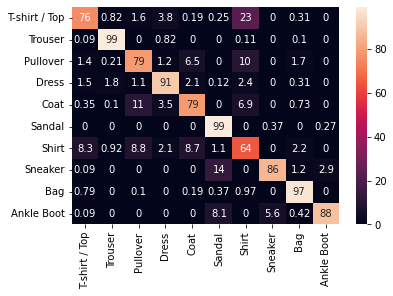

In [27]:
# Confusion Matrix vor k = 13 and PC Variance 100%
dftest = pnd.read_csv('C:/Users/awark/Bioinfo Projekt/Results/out.csv')
y_pred = np.array(dftest['13'])
y_true = label_test
class_names = np.array(["T-shirt / Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"])
conf = sklearn.metrics.confusion_matrix(y_pred, label_test)
conf_df = pnd.DataFrame(conf, index=class_names, columns=class_names)
conf_df = round(conf_df*100 / conf_df.sum(axis=1),2)
print(conf_df)
sns.heatmap(conf_df, annot=True)

In [46]:
listprec = []
listrec = []
listfscore = []
for csvdata in csv_filess:
    dfmeasures = pnd.read_csv(csvdata)
    for i in range(14):
        ypred = dfmeasures.iloc[:,i]
        prf = precision_recall_fscore_support(y_true, y_pred, average=None, labels=label_test)
        precision=prf[0]
        recall=prf[1]
        fscore=prf[2]       
        listprec.append(precision)
        listrec.append(recall)
        listfscore.append(fscore)

print(listrec)


[array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 0.963]), array([0.857, 0.963, 0.775, ..., 0.933, 0.933, 